# Exploration

Import libraries 

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import re
import seaborn as sns
import weightedcalcs as wc

Import functions from source code

In [59]:
import sys
import os
sys.path.append('../src/features')
from build_features import filter_col_with_regex, fill_nulls, get_dummies

<i> Each observation is matched to a sampling frame constructed by the U.S. Census Bureau’s American Community Survey and weighted by a set of demographic and non-demographic variables<i> ( [Methodology](link ) )

In [60]:
with open('../data/processed/df.pickle', 'rb') as file:
    df = pickle.load(file)

Set up function for weighting observations

In [61]:
weight = df['weight']
calc = wc.Calculator('weight')

## Explore potential targets

<br>
<b>Generally speaking, do you think of yourself as a ...?</b>
    <br>(Party identification)

Calculate weighted distribution of responses

In [62]:
party_freq_series = calc.distribution(df, 'pid3_2016').round(3)
party_list = ['Democrat', 'Republican', 'Independent', 'Other', 'Not Sure']
party_freq_dict = dict(party_freq_series)
for ind, val in enumerate(party_freq_dict.values()):
    print(party_list[ind], val)

Democrat 0.36
Republican 0.294
Independent 0.296
Other 0.018
Not Sure 0.031


Set set colors for plot

In [63]:
clrs_party = ['cornflowerblue', 'tomato', 'purple', 'lightgrey', 'dimgrey']

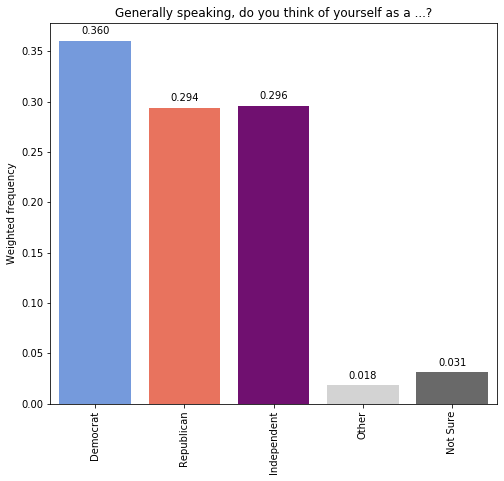

In [64]:
plt.figure(figsize=(8, 7))
bar_plot = sns.barplot(x=party_list,
                       y=list(party_freq_series),
                       palette=clrs_party)
bar_plot.set_xticklabels(rotation=90, labels=party_list)
bar_plot.set_title('Generally speaking, do you think of yourself as a ...?')
bar_plot.set_ylabel('Weighted frequency')
# add labels to bars
for bar in bar_plot.patches:
    bar_plot.annotate(format(bar.get_height(), '.3f'), (bar.get_x() + bar.get_width() / 2.,
                                                        bar.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()


Which <b>features</b> are correlated with <i>party</i>?

In [65]:
df.corr()['pid3_2016'].sort_values(ascending=False).head(10)

pid3_2016            1.000000
post_pid3_2012       0.702563
pid3_baseline        0.578848
pid7_2016            0.504512
post_pid7_2012       0.455840
pp_demprim16_2016    0.455295
pid7_baseline        0.438591
fav_hrc_2016         0.423551
obamaapp_2016        0.407291
fav_obama_2016       0.379822
Name: pid3_2016, dtype: float64

<br>
<b>Who did you vote for in the election for President?<b>

Calculate weighted distribution of responses

In [70]:
vote_freq_series = calc.distribution(df, 'presvote16post_2016').round(3)
vote_list = ['Hillary Clinton', 'Donald Trump', 'Gary Johnson',
                  'Jill Stein', 'Evan McMullin', 'Other', 'Did not vote', 'No Response']
vote_freq_dict = dict(vote_freq_series)
for ind, val in enumerate(vote_freq_dict.values()):
    print(vote_list[ind], val)
    

Hillary Clinton 0.406
Donald Trump 0.399
Gary Johnson 0.027
Jill Stein 0.012
Evan McMullin 0.002
Other 0.016
Did not vote 0.008
No Response 0.13


Set colors and labels to plot responses

In [67]:
clrs = ['cornflowerblue', 'tomato', 'gold', 'lightgreen',
        'purple', 'lightgrey', 'dimgrey', 'darkgray']
cand_list = ['Clinton', 'Trump', 'Johnson', 'Stein',
             'McMullin', 'Other', 'Did not vote', 'No Response', ]

Plot responses to survey question

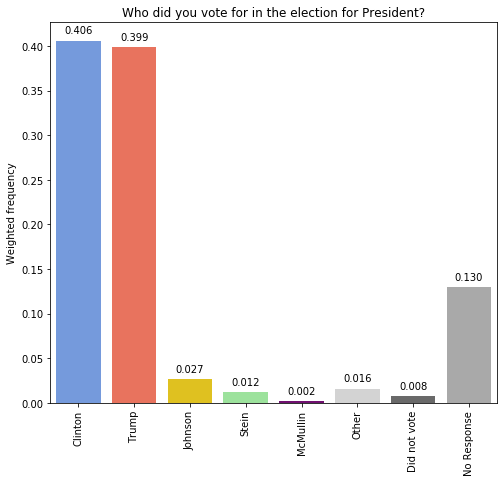

In [72]:
plt.figure(figsize=(8, 7))
bar_plot = sns.barplot(x=cand_list,
                       y=list(vote_freq_series),
                       palette=clrs)
bar_plot.set_xticklabels(rotation=90, labels=cand_list)
bar_plot.set_title('Who did you vote for in the election for President?')
bar_plot.set_ylabel('Weighted frequency')
# add labels to bars
for bar in bar_plot.patches:
    bar_plot.annotate(format(bar.get_height(), '.3f'), (bar.get_x() + bar.get_width() / 2.,
                                                        bar.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Which <b>features</b> are correlated with <i>candidate</i>?

In [69]:
df.corr()['presvote16post_2016'].sort_values(ascending=False).head(10)

presvote16post_2016        1.000000
vote_for_against_2016      0.831710
vote_3cat                  0.814751
vote_regrets_2016          0.797544
votemeth16_2016            0.677630
accurately_counted_2016    0.650837
turnout16_2016             0.526559
post_presvote12_2012       0.358575
fav_hrc_2016               0.320787
Clinton_Cruz_2016          0.318441
Name: presvote16post_2016, dtype: float64

How does the data look with three categories for candidate? 

In [77]:
cnd_3cat_series = calc.distribution(df, 'vote_3cat').round(3)
cnd_3cat_list = ['Hillary Clinton', 'Donald Trump', 'Other/No Response']
cnd_3cat_freq_dict = dict(cnd_3cat_series)
for ind, val in enumerate(cnd_3cat_freq_dict.values()):
    print(cnd_3cat_list[ind], val)

Hillary Clinton 0.406
Donald Trump 0.399
Other/No Response 0.195


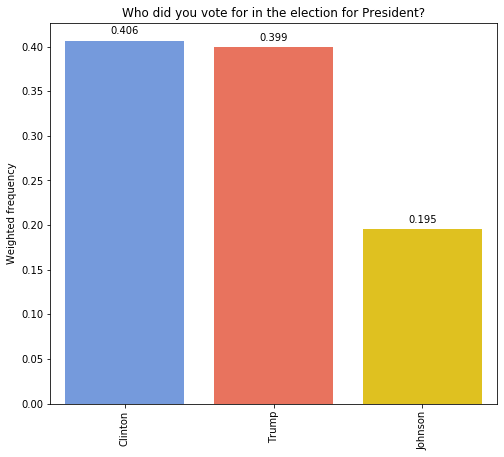

In [79]:
plt.figure(figsize=(8, 7))
bar_plot = sns.barplot(x=cnd_3cat_list,
                       y=list(cnd_3cat_series),
                       palette=clrs)
bar_plot.set_xticklabels(rotation=90, labels=cand_list)
bar_plot.set_title('Who did you vote for in the election for President?')
bar_plot.set_ylabel('Weighted frequency')
# add labels to bars
for bar in bar_plot.patches:
    bar_plot.annotate(format(bar.get_height(), '.3f'), (bar.get_x() + bar.get_width() / 2.,
                                                        bar.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

## Explore potential predictors

Inspired by Tim Carney's <i>Alienated America</i>... <br>Which <b>community features</b> are correlated with vote selection?

In [80]:
# print list of community engagement column names
col_list = []
for i in range(1, 18):
    col = f'volunteerorg2_{i}_baseline'
    col_list.append(col)

# selected community engagement fields
community_list = ['CIVIC_PARTICIPATION_2016',
                  'pew_churatd_2016',
                  'volunteer_baseline',
                  'volunteerf_baseline',
                  'volunteernum_baseline'
                  ]

target = ['presvote16post_2016']
df_community = df[(col_list + community_list + target)]
print('number of community features:', len(col_list + community_list))
df_community.head()

number of community features: 22


,volunteerorg2_1_baseline,volunteerorg2_2_baseline,volunteerorg2_3_baseline,volunteerorg2_4_baseline,volunteerorg2_5_baseline,volunteerorg2_6_baseline,volunteerorg2_7_baseline,volunteerorg2_8_baseline,volunteerorg2_9_baseline,volunteerorg2_10_baseline,...,volunteerorg2_14_baseline,volunteerorg2_15_baseline,volunteerorg2_16_baseline,volunteerorg2_17_baseline,CIVIC_PARTICIPATION_2016,pew_churatd_2016,volunteer_baseline,volunteerf_baseline,volunteernum_baseline,presvote16post_2016
0,2,2,2,2,2,2,1,2,2,2,...,2,2,2,2,3.0,5.0,1.0,8.0,1.0,1.0
1,1,1,2,2,2,2,2,2,2,2,...,2,2,2,2,5.0,1.0,1.0,8.0,1.0,2.0
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,6.0,5.0,2.0,2.0,8.0,1.0
3,2,2,2,2,1,2,2,2,2,2,...,2,2,2,1,5.0,5.0,1.0,8.0,3.0,3.0
4,1,1,2,2,2,2,2,2,2,2,...,2,2,2,2,4.0,1.0,2.0,1.0,1.0,2.0


In [81]:
df_community.corr()['presvote16post_2016'].sort_values(ascending=False).head(10)

presvote16post_2016          1.000000
CIVIC_PARTICIPATION_2016     0.077853
volunteernum_baseline        0.061289
volunteerorg2_4_baseline     0.060472
volunteerorg2_6_baseline     0.055965
volunteerorg2_12_baseline    0.046307
volunteer_baseline           0.042013
volunteerorg2_13_baseline    0.040980
volunteerorg2_7_baseline     0.034954
volunteerorg2_10_baseline    0.030976
Name: presvote16post_2016, dtype: float64

Which <b>religion features</b> are correlated with vote selection?

In [82]:
religion_list = ['pew_churatd_2016',
                'pew_religimp_2016',
                'pew_bornagain_2016',
                'pew_prayer_2016',
                'religpew_2016'
                ]
print('number of religion features:', len(religion_list))
df_religion = df[(religion_list + target)]
df_religion.head()

number of religion features: 5


,pew_churatd_2016,pew_religimp_2016,pew_bornagain_2016,pew_prayer_2016,religpew_2016,presvote16post_2016
0,5.0,3,2.0,6.0,2.0,1.0
1,1.0,1,2.0,1.0,3.0,2.0
2,5.0,4,2.0,3.0,2.0,1.0
3,5.0,3,2.0,3.0,11.0,3.0
4,1.0,1,2.0,2.0,3.0,2.0


In [83]:
target_col_list = ['pid3_2016']

## Weighted issue prioritization of climate change

In [84]:
climate_freq = calc.distribution(df_no_nulls, 'imiss_l_2016').round(3)
print('weighted frequency:', climate_freq)

NameError: name 'df_no_nulls' is not defined

In [85]:
climate_list = []
for i in climate_freq:
    climate_list.append(i)
print(climate_list)
plt.figure(figsize=(8,8))
x = ['Very','Somewhat','Not very','Unimportant','No Response']
bplot = sns.barplot(x = x, y = climate_list, palette='Greens_d')
bplot.set_xticklabels(rotation=90, labels= x)
bplot.set_title('Survey Responses: How important of an issue is climate change?')
bplot.set_ylabel('Weighted Frequency')
for p in bplot.patches:
 bplot.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
            xytext = (0, 10), textcoords = 'offset points')
plt.show()

NameError: name 'climate_freq' is not defined

### Climate change

In [ ]:
g = df_3cat_issue_weight.groupby(['presvote16post_2016'])
res = calc.distribution(g, 'imiss_l_2016').round(3)
print(res)

In [ ]:
b=['cornflowerblue','tomato','lightgrey']
stacked = res.T.plot(kind='bar', stacked=True, color=b)
stacked.set_title('Survey Response: Climate change')
stacked.set_ylabel('Weighted frequency')
stacked.legend(['Clinton','Trump', 'Other'])
stacked.set_xlabel('')
N = 5 
ind = np.arange(N)
plt.xticks(ind, ('Very','Somewhat','Not very', 'Unimportant', 'No Response'))
plt.show()

### The budget deficit

In [ ]:
g = df_3cat_issue_weight.groupby(['presvote16post_2016'])
res = calc.distribution(g, 'imiss_p_2016').round(3)
print(res)

In [ ]:
b=['cornflowerblue','tomato','lightgrey']
stacked = res.T.plot(kind='bar', stacked=True, color=b)
stacked.set_title('Survey Response: The Budget deficit')
stacked.set_ylabel('Weighted frequency')
stacked.legend(['Clinton','Trump', 'Other'])
stacked.set_xlabel('')
N = 5 
ind = np.arange(N)
plt.xticks(ind, ('Very','Somewhat','Not very', 'Unimportant', 'No Response'))
plt.show()

### Abortion

In [ ]:
g = df_3cat_issue_weight.groupby(['presvote16post_2016'])
res = calc.distribution(g, 'imiss_t_2016').round(3)
print(res)
b=['cornflowerblue','tomato','lightgrey']
stacked = res.T.plot(kind='bar', stacked=True, color=b)
stacked.set_title('Survey Response: Abortion')
stacked.set_ylabel('Weighted frequency')
stacked.legend(['Clinton','Trump', 'Other'])
stacked.set_xlabel('')
N = 5 
ind = np.arange(N)
plt.xticks(ind, ('Very','Somewhat','Not very', 'Unimportant', 'No Response'))
plt.show()

### Size of government

In [ ]:
g = df_3cat_issue_weight.groupby(['presvote16post_2016'])
res = calc.distribution(g, 'imiss_u_2016').round(3)
print(res)
b=['cornflowerblue','tomato','lightgrey']
stacked = res.T.plot(kind='bar', stacked=True, color=b)
stacked.set_title('Survey Response: Size of government')
stacked.set_ylabel('Weighted frequency')
stacked.legend(['Clinton','Trump', 'Other'])
stacked.set_xlabel('')
N = 5 
ind = np.arange(N)
plt.xticks(ind, ('Very','Somewhat','Not very', 'Unimportant', 'No Response'))
plt.show()

within these columns in the dataframe, search each index and count the number of 4s. 


In [ ]:
df[]